# **Visualization of transporter expression and kidney/lung signature scores in the single-cell dataset**

## Imports

In [2]:
import os
import ast
import itertools
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as ad
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from scipy.stats import hypergeom
from statsmodels.stats.multitest import multipletests
import gseapy
import warnings
warnings.filterwarnings("ignore")

BASE_PATH = "/home/projects/nyosef/oier/Harreman_files/Slide_seq_lung"
ADATA_PATH = os.path.join(BASE_PATH, 'h5ads')
DATA_PATH = os.path.join(BASE_PATH, 'data')
PLOTS_PATH = os.path.join(BASE_PATH, 'plots')

## Figure S5B

In [3]:
adata = sc.read_h5ad(os.path.join(ADATA_PATH, 'Slide_seq_lung_sc_ref_adata.h5ad'))

In [4]:
adata.X = adata.layers['counts']
norm = sc.pp.normalize_total(adata, target_sum=1e4, inplace=False)
adata.layers["normalized"] = norm["X"]
adata.layers["log_norm"] = sc.pp.log1p(norm["X"])

In [12]:
cell_types = ['Endothelial', 'TAM', 'T-Helper', 'CD8+ T cell', 'Tumor', 'DC']

In [19]:
# ct_adata = adata[adata.obs['cell_type_coarse'].isin(cell_types)].copy()

In [5]:
marker_genes_dict = {
    "L-Lactate": ["SLC16A1", "SLC16A5", "SLC16A2", "SLC16A7", "SLC16A3"],
    "Sodium/calcium exchange": ["SLC8A1"],
}

In [16]:
print('\n'.join(["SLC16A1", "SLC16A5", "SLC16A2", "SLC16A7", "SLC16A3", "SLC8A1"]))

SLC16A1
SLC16A5
SLC16A2
SLC16A7
SLC16A3
SLC8A1


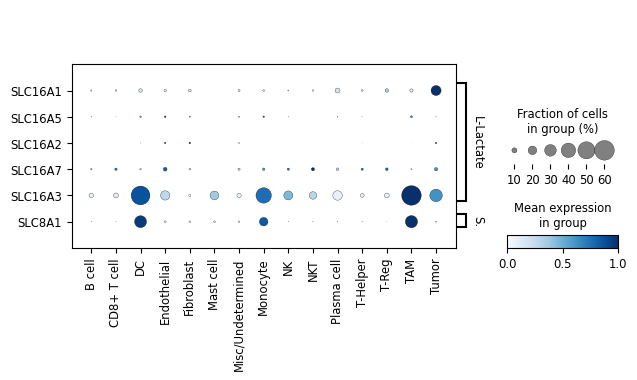

In [12]:
sc.pl.dotplot(adata, marker_genes_dict, "cell_type_coarse", dendrogram=False, standard_scale='var', layer='log_norm', cmap='Blues', swap_axes=True)

In [15]:
print('\n'.join(adata.obs['cell_type_coarse'].cat.categories))

B cell
CD8+ T cell
DC
Endothelial
Fibroblast
Mast cell
Misc/Undetermined
Monocyte
NK
NKT
Plasma cell
T-Helper
T-Reg
TAM
Tumor


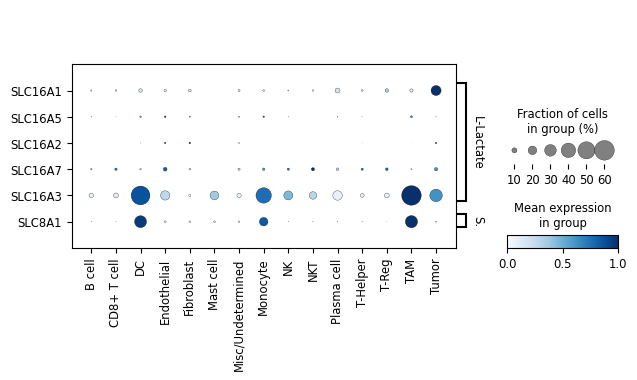

In [13]:
sc.pl.dotplot(adata, marker_genes_dict, "cell_type_coarse", dendrogram=False, standard_scale='var', layer='log_norm', cmap='Blues', swap_axes=True, show=False)
plt.savefig(os.path.join(PLOTS_PATH, "transporter_expr_dot_plot.pdf"))

## Figure S5C

In [ ]:
adata = sc.read_h5ad(os.path.join(ADATA_PATH, 'kidney_lung_visionpy_adata.h5ad'))

In [ ]:
signatures = adata.obsm['vision_signatures'].columns

In [ ]:
for sig in signatures:
    adata.obs[sig] = adata.obsm['vision_signatures'][sig]

In [ ]:
palette = {
    'Module 1': "#E41A1C",
    'Module 2': "#377EB8",
}

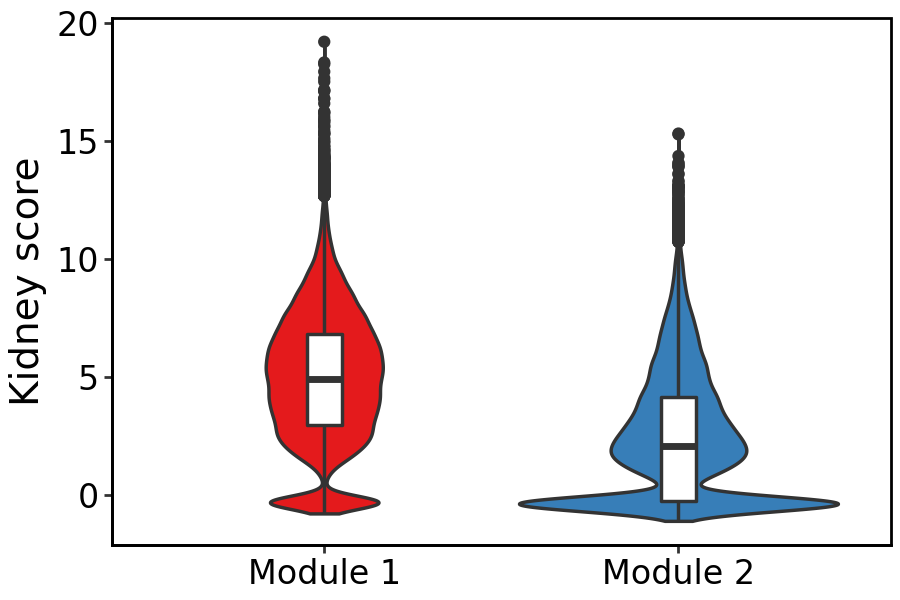

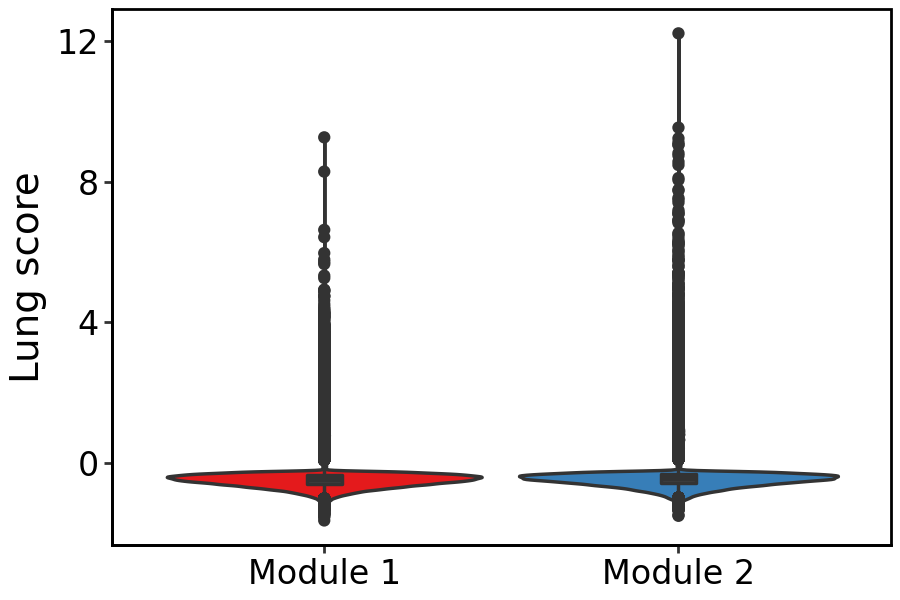

In [ ]:
for sig in signatures:
    fig = (
    ggplot(data=adata.obs, mapping=aes(x='top_module', y=sig, fill='top_module')) 
    + geom_violin(size=0.7)
    + geom_boxplot(width=0.1, fill='white', size=0.7)
    + scale_fill_manual(values=palette)
    + xlab('')
    + ylab(f'{sig} score')
    + theme_classic() 
    + theme(plot_title = element_text(hjust = 0.5,
                                    margin={"t": 0, "b": 5, "l": 0, "r": 0},
                                    size = 14,
                                    face='bold'),
            legend_position = "none",
            # axis_title_x = element_text(size = 11),
            axis_title_y = element_text(size = 14),
            axis_text_x = element_text(margin={"t": 0, "b": 0, "l": 10, "r": 0}, size = 12, colour='black'),
            # axis_text_x = element_blank(),
            axis_text_y = element_text(margin={"t": 0, "b": 0, "l": 0, "r": 10}, size = 12, colour='black'),
            panel_border = element_rect(color='black'),
            panel_background = element_rect(colour = "black",
                                            linewidth = 1),
            figure_size=(4.5, 3))
    )
    fig.show()
    fig.save(os.path.join(PLOTS_PATH, f'{sig}_score_violin_plot.svg'), format='svg')